In [2]:

from PIL import ImageColor, ImageFont, ImageDraw
import numpy as np

from vif.models.detection import SegmentationMask
        
def plot_segmentation_masks(img: Image, segmentation_masks: list[SegmentationMask]):
    """
    Plots bounding boxes on an image with markers for each a name, using PIL, normalized coordinates, and different colors.

    Args:
        img: The PIL.Image.
        segmentation_masks: A string encoding as JSON a list of segmentation masks containing the name of the object,
         their positions in normalized [y1 x1 y2 x2] format, and the png encoded segmentation mask.
    """
    # Define a list of colors
    colors = [
        "red",
        "green",
        "blue",
        "yellow",
        "orange",
        "pink",
        "purple",
        "brown",
        "gray",
        "beige",
        "turquoise",
        "cyan",
        "magenta",
        "lime",
        "navy",
        "maroon",
        "teal",
        "olive",
        "coral",
        "lavender",
        "violet",
        "gold",
        "silver",
    ]
    font = ImageFont.truetype("NotoSansCJK-Regular.ttc", size=14)

    # Do this in 3 passes to make sure the boxes and text are always visible.

    # Overlay the mask
    for i, mask in enumerate(segmentation_masks):
        color = colors[i % len(colors)]
        img = overlay_mask_on_img(img, mask.mask, color)

    # Create a drawing object
    draw = ImageDraw.Draw(img)

    # Draw the bounding boxes
    for i, mask in enumerate(segmentation_masks):
        color = colors[i % len(colors)]
        draw.rectangle(((mask.x0, mask.y0), (mask.x1, mask.y1)), outline=color, width=4)

    # Draw the text labels
    for i, mask in enumerate(segmentation_masks):
        color = colors[i % len(colors)]
        if mask.label != "":
            draw.text((mask.x0 + 8, mask.y0 - 20), mask.label, fill=color, font=font)
    return img

def overlay_mask_on_img(
    img: Image, mask: np.ndarray, color: str, alpha: float = 0.7
) -> Image.Image:
    """
    Overlays a single mask onto a PIL Image using a named color.

    The mask image defines the area to be colored. Non-zero pixels in the
    mask image are considered part of the area to overlay.

    Args:
        img: The base PIL Image object.
        mask: A PIL Image object representing the mask.
              Should have the same height and width as the img.
              Modes '1' (binary) or 'L' (grayscale) are typical, where
              non-zero pixels indicate the masked area.
        color: A standard color name string (e.g., 'red', 'blue', 'yellow').
        alpha: The alpha transparency level for the overlay (0.0 fully
               transparent, 1.0 fully opaque). Default is 0.7 (70%).

    Returns:
        A new PIL Image object (in RGBA mode) with the mask overlaid.

    Raises:
        ValueError: If color name is invalid, mask dimensions mismatch img
                    dimensions, or alpha is outside the 0.0-1.0 range.
    """
    if not (0.0 <= alpha <= 1.0):
        raise ValueError("Alpha must be between 0.0 and 1.0")

    # Convert the color name string to an RGB tuple
    try:
        color_rgb: tuple[int, int, int] = ImageColor.getrgb(color)
    except ValueError as e:
        # Re-raise with a more informative message if color name is invalid
        raise ValueError(
            f"Invalid color name '{color}'. Supported names are typically HTML/CSS color names. Error: {e}"
        )

    # Prepare the base image for alpha compositing
    img_rgba = img.convert("RGBA")
    width, height = img_rgba.size

    # Create the colored overlay layer
    # Calculate the RGBA tuple for the overlay color
    alpha_int = int(alpha * 255)
    overlay_color_rgba = color_rgb + (alpha_int,)

    # Create an RGBA layer (all zeros = transparent black)
    colored_mask_layer_np = np.zeros((height, width, 4), dtype=np.uint8)

    # Mask has values between 0 and 255, threshold at 127 to get binary mask.
    mask_np_logical = mask > 127

    # Apply the overlay color RGBA tuple where the mask is True
    colored_mask_layer_np[mask_np_logical] = overlay_color_rgba

    # Convert the NumPy layer back to a PIL Image
    colored_mask_layer_pil = Image.fromarray(colored_mask_layer_np, "RGBA")

    # Composite the colored mask layer onto the base image
    result_img = Image.alpha_composite(img_rgba, colored_mask_layer_pil)

    return result_img

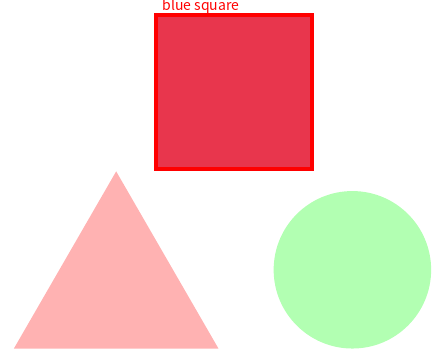

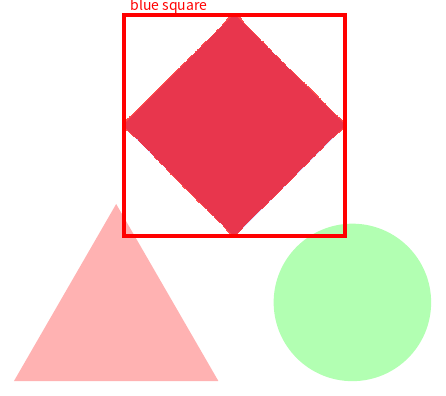

In [7]:
import pickle
from vif.models.detection import SegmentationMask
from PIL import Image

original_features: list[SegmentationMask] = pickle.loads(
            open("tests/resources/seg/rgb_stc.pickle", "rb").read()
        )
custom_features: list[SegmentationMask] = pickle.loads(
            open("tests/resources/seg/stc_rgb_rotc.pickle", "rb").read()
        )

ori_image = Image.open("tests/resources/seg/rgb_stc.png")
cust_image = Image.open("tests/resources/seg/stc_rgb_rotc.png")

ori = plot_segmentation_masks(ori_image,original_features)
cust = plot_segmentation_masks(cust_image,custom_features)

display(ori)
display(cust)


In [5]:
original_features

[SegmentationMask(y0=13, x0=154, y1=170, x1=313, mask=array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(363, 446), dtype=uint8), label='blue square')]